# Monte Carlo Simulation for Portfolio Returns

This notebook demonstrates how to use Monte Carlo simulation to model the future value of a portfolio composed of Brazilian stocks. We fetch historical price data for a selection of stocks using the `yfinance` library, calculate daily returns, mean returns, and the covariance matrix. Using these statistics, we simulate multiple possible future paths for the portfolio value over a specified time horizon. The simulation incorporates random shocks and the correlation structure between assets to provide a probabilistic view of potential investment outcomes. This approach is useful for understanding the range of possible returns and risks associated with a diversified portfolio.

/tmp/ipykernel_16608/2583198004.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start, end=end)
[*********************100%***********************]  7 of 7 completed


Data fetched for ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'RAIZ4.SA', 'WEGE3.SA', 'LREN3.SA', 'MGLU3.SA'] from 2024-07-01 to 2025-07-01
Ticker
ITUB4.SA    0.001064
LREN3.SA    0.002793
MGLU3.SA    0.000035
PETR4.SA   -0.000335
RAIZ4.SA   -0.002039
VALE3.SA   -0.000594
WEGE3.SA    0.000348
dtype: float64 Ticker    ITUB4.SA  LREN3.SA  MGLU3.SA  PETR4.SA  RAIZ4.SA  VALE3.SA  WEGE3.SA
Ticker                                                                        
ITUB4.SA  0.000174  0.000181  0.000232  0.000034  0.000121  0.000044  0.000035
LREN3.SA  0.000181  0.000816  0.000716  0.000072  0.000306  0.000113  0.000101
MGLU3.SA  0.000232  0.000716  0.001773  0.000141  0.000516  0.000210  0.000100
PETR4.SA  0.000034  0.000072  0.000141  0.000226  0.000073  0.000062  0.000065
RAIZ4.SA  0.000121  0.000306  0.000516  0.000073  0.000689  0.000111  0.000068
VALE3.SA  0.000044  0.000113  0.000210  0.000062  0.000111  0.000279  0.000069
WEGE3.SA  0.000035  0.000101  0.000100  0.000065  0.000068  0.00006

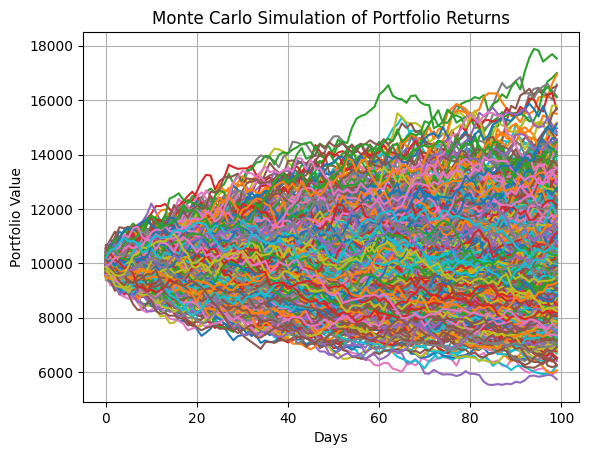

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

def get_data(stocks, start, end):
    
    data = yf.download(stocks, start=start, end=end)
    print(f"Data fetched for {stocks} from {start} to {end}")
    returns = data['Close'].pct_change().dropna()
    covariance = returns.cov()
    mean_returns = returns.mean()
    return mean_returns, covariance

stocks = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'RAIZ4.SA', 'WEGE3.SA', 'LREN3.SA', 'MGLU3.SA']
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365)  # 1 year back

mean_returns, covariance = get_data(stocks, start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))
print(mean_returns, covariance)

weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)  # Normalize weights

# Monte Carlo simulation for portfolio returns
mc_sims = 1000
T = 100 # Time periods

meanM = np.full(shape=(T, len(weights)), fill_value=mean_returns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initial_investment = 10000  # Initial investment amount

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covariance)
    daily_returns = np.inner(L, Z) + meanM
    portfolio_sims[:,m] = np.cumproduct(np.inner(weights, daily_returns.T)+1)* initial_investment
    
plt.plot(portfolio_sims)
plt.title('Monte Carlo Simulation of Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.grid()
plt.show()